100%|██████████| 2000/2000 [00:02<00:00, 765.92it/s]


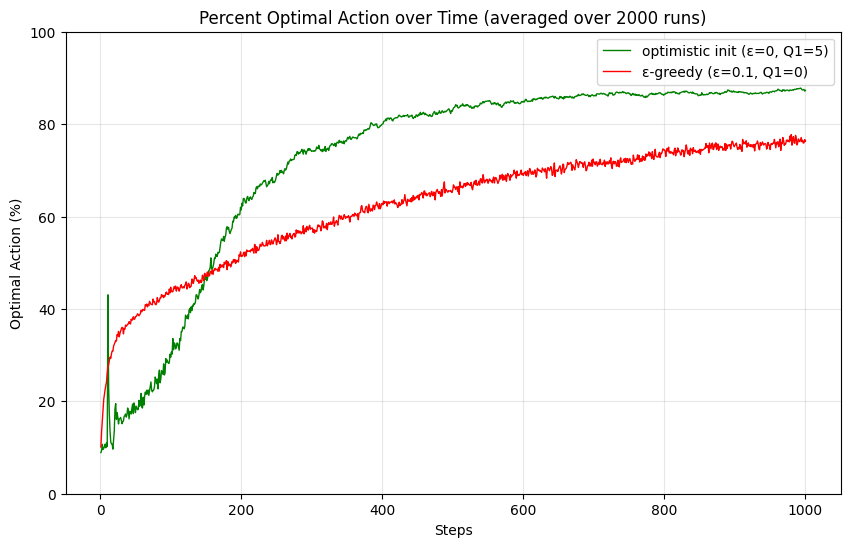

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_RUNS = 2000
NUM_STEPS = 1000
K = 10

def run_simulation(epsilon, alpha, initial_av_est):
    true_action_values = np.random.randn(K)
    optimal_action = np.argmax(true_action_values)
    optimal_selected = []

    def sample_reward(index):
        return np.random.randn() + true_action_values[index]

    def choose_action(eps, estimated_action_values):
        if np.random.rand() < eps:
            return np.random.randint(K)
        else:
            return np.argmax(estimated_action_values)

    estimated_action_values = np.array([initial_av_est] * K, dtype=float)
    visit_counts = np.zeros(K, dtype=int)

    for _ in range(NUM_STEPS):
        action = choose_action(epsilon, estimated_action_values)
        reward = sample_reward(action)
        visit_counts[action] += 1
        if alpha == 'avg':
            step_size = 1.0 / visit_counts[action]
            estimated_action_values[action] += step_size * (reward - estimated_action_values[action])
        else:
            estimated_action_values[action] += alpha * (reward - estimated_action_values[action])
        optimal_selected.append(1 if action == optimal_action else 0)

    return optimal_selected

def get_optimal_action_percentages(epsilon, alpha='avg', initial_av_est=0.0):
    all_flags = []
    for _ in tqdm(range(NUM_RUNS)):
        flags = run_simulation(epsilon, alpha, initial_av_est)
        all_flags.append(flags)
    all_flags = np.array(all_flags)  # shape: (NUM_RUNS, NUM_STEPS)
    return np.mean(all_flags, axis=0) * 100.0

optimistic_pct = get_optimal_action_percentages(epsilon=0.0, alpha=.1, initial_av_est=5.0)
epsgreedy_pct = get_optimal_action_percentages(epsilon=0.1, alpha=.1, initial_av_est=0.0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_STEPS + 1), optimistic_pct, 'g-', linewidth=1, label='optimistic init (ε=0, Q1=5)')
plt.plot(range(1, NUM_STEPS + 1), epsgreedy_pct, 'r-', linewidth=1, label='ε-greedy (ε=0.1, Q1=0)')
plt.xlabel('Steps')
plt.ylabel('Optimal Action (%)')
plt.ylim(0, 100)
plt.title(f'Percent Optimal Action over Time (averaged over {NUM_RUNS} runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[ 8.9   9.3  10.7   9.6   9.8  10.15 10.7   9.95 11.   10.2  43.05 23.
 17.15 13.5  11.2  10.8  10.75  9.65 11.6  13.55 18.35 19.5  16.1  17.55
 16.55]


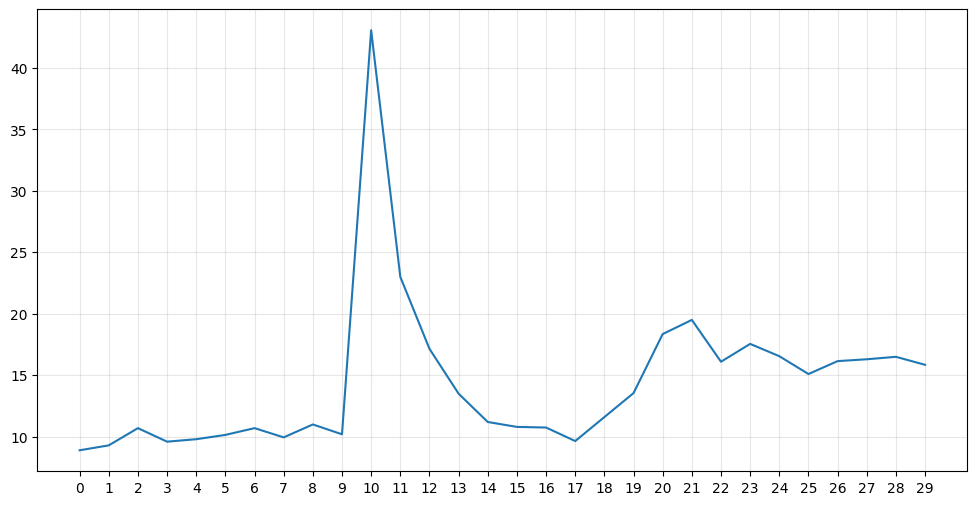

In [23]:
# we can think about the spike, there is one big spike and there is one medium sized jump
# we should actually check on what number steps they occur
print(optimistic_pct[:25])
plt.figure(figsize=(12, 6))
plt.plot(optimistic_pct[:30])
plt.grid(True, which='both', axis='both', alpha=0.3)
plt.xticks(range(30))
plt.show()


- i suppose the first ten steps will always explore all ten actions in a random order
- the 11th step will choose the action with the highest value, this will often be the optimal one but not always since there is randomness in the reward
- then the quick hill climb strats at 17, it already explored most actions for a second time, and for some runs, the optimal action will already stand out
- the chance of it standing out increases until we choose it for its second time, then it it decreases temporarily because its action value will almost certainly be lowered again
- lets rerun all the above code but with much more runs and then we will plot the first 50 steps

100%|██████████| 100000/100000 [02:12<00:00, 757.05it/s]


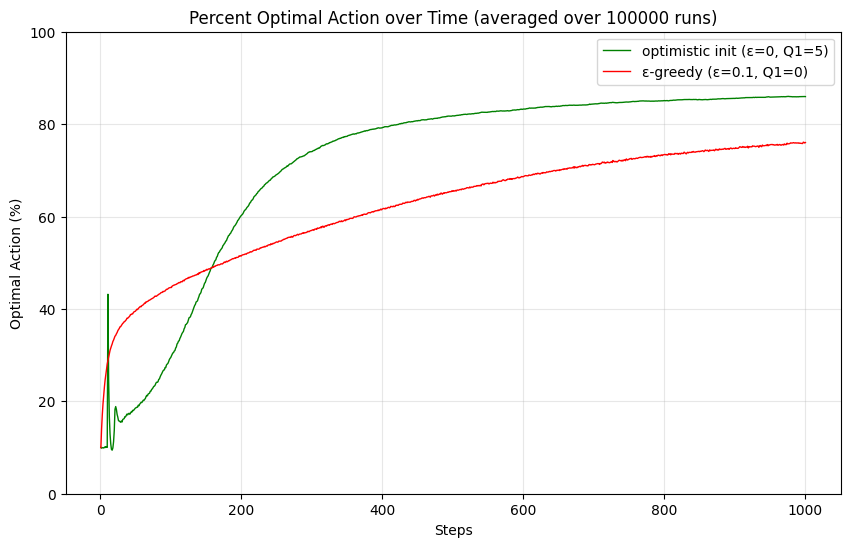

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_RUNS = 100000
NUM_STEPS = 1000
K = 10

def run_simulation(epsilon, alpha, initial_av_est):
    true_action_values = np.random.randn(K)
    optimal_action = np.argmax(true_action_values)
    optimal_selected = []

    def sample_reward(index):
        return np.random.randn() + true_action_values[index]

    def choose_action(eps, estimated_action_values):
        if np.random.rand() < eps:
            return np.random.randint(K)
        else:
            return np.argmax(estimated_action_values)

    estimated_action_values = np.array([initial_av_est] * K, dtype=float)
    visit_counts = np.zeros(K, dtype=int)

    for _ in range(NUM_STEPS):
        action = choose_action(epsilon, estimated_action_values)
        reward = sample_reward(action)
        visit_counts[action] += 1
        if alpha == 'avg':
            step_size = 1.0 / visit_counts[action]
            estimated_action_values[action] += step_size * (reward - estimated_action_values[action])
        else:
            estimated_action_values[action] += alpha * (reward - estimated_action_values[action])
        optimal_selected.append(1 if action == optimal_action else 0)

    return optimal_selected

def get_optimal_action_percentages(epsilon, alpha='avg', initial_av_est=0.0):
    all_flags = []
    for _ in tqdm(range(NUM_RUNS)):
        flags = run_simulation(epsilon, alpha, initial_av_est)
        all_flags.append(flags)
    all_flags = np.array(all_flags)  # shape: (NUM_RUNS, NUM_STEPS)
    return np.mean(all_flags, axis=0) * 100.0

optimistic_pct = get_optimal_action_percentages(epsilon=0.0, alpha=.1, initial_av_est=5.0)
epsgreedy_pct = get_optimal_action_percentages(epsilon=0.1, alpha=.1, initial_av_est=0.0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_STEPS + 1), optimistic_pct, 'g-', linewidth=1, label='optimistic init (ε=0, Q1=5)')
plt.plot(range(1, NUM_STEPS + 1), epsgreedy_pct, 'r-', linewidth=1, label='ε-greedy (ε=0.1, Q1=0)')
plt.xlabel('Steps')
plt.ylabel('Optimal Action (%)')
plt.ylim(0, 100)
plt.title(f'Percent Optimal Action over Time (averaged over {NUM_RUNS} runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[10.055  9.863  9.931 10.     9.892 10.003 10.172  9.998 10.205 10.031
 43.172 24.465 16.619 12.892 10.779  9.592  9.425  9.914 11.26  13.745
 18.272 18.867 18.259 17.179 16.579]


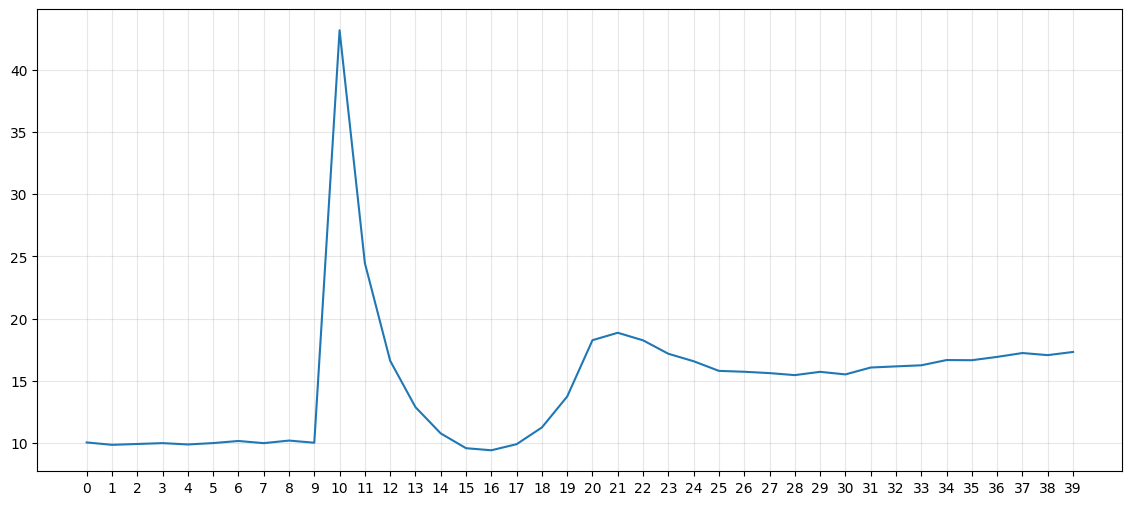

In [28]:
# we can think about the spike, there is one big spike and there is one medium sized jump
# we should actually check on what number steps they occur
print(optimistic_pct[:25])
plt.figure(figsize=(14, 6))
plt.plot(optimistic_pct[:40])
plt.grid(True, which='both', axis='both', alpha=0.3)
plt.xticks(range(40))
plt.show()

- as u can see the 21st step is a local high, even tho on step 2 already we are taking an action after performing 2 sweeps of the actions (because our first step is 0)
- basically, while this graph makes sense to me, its not an obvious thing, and i would be at loss trying to prove that the graph would look like this